## ISE-291 PROJECT (221)

Section 9 - Team 1 

## 2. Data Preparation:

In [1]:
# 2-a
# We read the data and display the first 5 rows
import pandas as pd
df = pd.read_csv('imdb_top_1000.csv', header=0)
# display(df.head(15))
display(df.head(5))

,Movie_Title,Released_Year,Director,Actor,IMDB_Rating,No_of_Votes,Runtime(Mins),Genre,Certificate,Total_Gross($)
0,The Shawshank Redemption,1994,Frank Darabont,Tim Robbins,9.3,2343110,142,Drama,A,28341469.0
1,The Godfather,1972,Francis Ford Coppola,Marlon Brando,9.2,1620367,175,"Crime, Drama",A,134966411.0
2,The Dark Knight,2008,Christopher Nolan,Christian Bale,9.0,2303232,152,"Action, Crime, Drama",UA,534858444.0
3,The Godfather: Part II,1974,Francis Ford Coppola,Al Pacino,9.0,1129952,202,"Crime, Drama",A,57300000.0
4,12 Angry Men,1957,Sidney Lumet,Henry Fonda,9.0,689845,96,"Crime, Drama",U,4360000.0


|Field | Type|
|-----|------|
| Movie_Title |Categorical |
| Released_Year |Numeric |
| Director  | Categorical|
| Actor | Categorical|
|IMDB_Rating  | Numeric|
| No_of_Votes| Numeric|
|Runtime(Mins) | Numeric|
|Genre | Categorical|
|Certificate | Categorical|
|Total_Gross($M) | Numeric|



In [2]:
# 2-b
# Find out the columns that have missing values
null_columns=df.columns[df.isna().any()]
print('\nColumns with missing data are:', null_columns)


Columns with missing data are: Index(['Certificate', 'Total_Gross($)'], dtype='object')


In [3]:
# Impute the missing values in column Total_Gross($M) with the mode of the column
# find the mean of the column
meanGross = df['Total_Gross($)'].mean()
df['Total_Gross($)'].fillna(meanGross, inplace=True)
# display(df.head(5))

In [4]:
# Devide Totla_Gross($M) by 1000000 to make it in millions, then rename it to Total_Gross($M)
df['Total_Gross($)'] = df['Total_Gross($)']/1000000
df.rename(columns={'Total_Gross($)':'Total_Gross($M)'}, inplace=True)
# display(df.head(5))

In [5]:
# Devide No_of_Votes by by 1000000 to make it in millions, then rename it to No_of_Votes(M)
df['No_of_Votes'] = df['No_of_Votes']/1000000
df.rename(columns={'No_of_Votes':'No_of_Votes(M)'}, inplace=True)
# display(df.head(5))

In [6]:
# Filter noise, in column Runtime we have some negitive values, so we should make it positive using abs.
df['Runtime(Mins)']=df['Runtime(Mins)'].apply(lambda x: x if x>=0 else abs(x))

# we have some values in column IMDB_Rating are less than 1.0
df['IMDB_Rating']=df['IMDB_Rating'].apply(lambda x: x if x>=1.0 else x*10)
# display(df.head(5))

In [7]:
# Some values in Certificate are messings so we should replace them with mode
modeCertificate = df['Certificate'].mode()[0]
df['Certificate'].fillna(modeCertificate, inplace=True)
display(df.sample(5))

,Movie_Title,Released_Year,Director,Actor,IMDB_Rating,No_of_Votes(M),Runtime(Mins),Genre,Certificate,Total_Gross($M)
591,Vicky Donor,2012,Shoojit Sircar,Ayushmann Khurrana,7.8,0.039710,126,"Comedy, Romance",UA,0.169209
678,Evil Dead II,1987,Sam Raimi,Bruce Campbell,7.8,0.148359,84,"Action, Comedy, Fantasy",A,5.923044
291,La battaglia di Algeri,1966,Gillo Pontecorvo,Brahim Hadjadj,8.1,0.053089,121,"Drama, War",U,0.055908
2,The Dark Knight,2008,Christopher Nolan,Christian Bale,9.0,2.303232,152,"Action, Crime, Drama",UA,534.858444
611,Män som hatar kvinnor,2009,Niels Arden Oplev,Michael Nyqvist,7.8,0.208994,152,"Crime, Drama, Mystery",R,10.095170


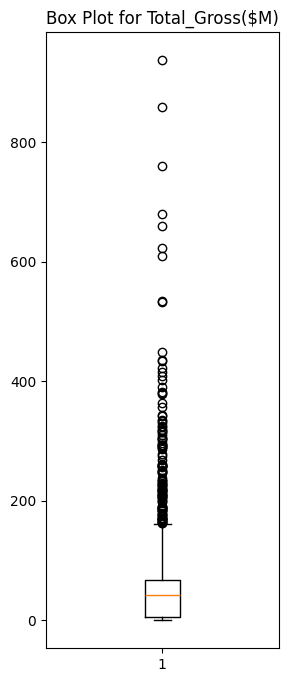

In [8]:
# Find the outliers in the data, then delete them
import numpy as np 
# Identify the outliers in Total_Gross($M)
Gross = np.array(df['Total_Gross($M)'])
import matplotlib.pyplot as plt
plt.figure(figsize=(3,8))
plt.boxplot(Gross) 
plt.title('Box Plot for Total_Gross($M)')
plt.show()

# Delete the outliers in Total_Gross($M)
Q1 = df['Total_Gross($M)'].quantile(0.25)
Q3 = df['Total_Gross($M)'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Total_Gross($M)'] >= Q1 - 1.5*IQR) & (df['Total_Gross($M)'] <= Q3 + 1.5*IQR)]

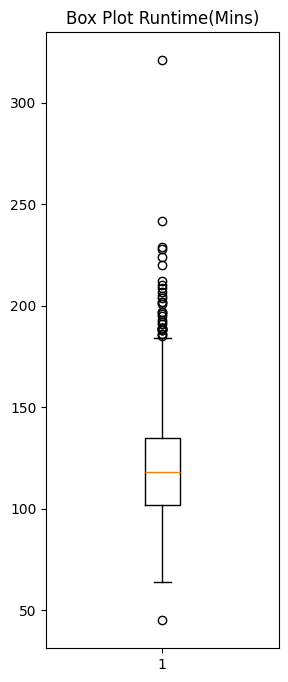

In [9]:
# Identify the outliers in Runtime
time = np.array(df['Runtime(Mins)'])
import matplotlib.pyplot as plt
plt.figure(figsize=(3,8))
plt.boxplot(time)
plt.title('Box Plot Runtime(Mins)')
plt.show()

# Delete the outliers in Runtime
Q1 = df['Runtime(Mins)'].quantile(0.25)
Q3 = df['Runtime(Mins)'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Runtime(Mins)'] >= Q1 - 1.5*IQR) & (df['Runtime(Mins)'] <= Q3 + 1.5*IQR)]

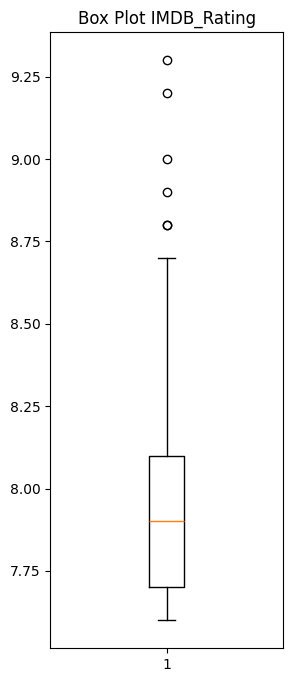

In [10]:
# Identify the outliers in Rating
rating = np.array(df['IMDB_Rating'])
import matplotlib.pyplot as plt
plt.figure(figsize=(3,8))
plt.boxplot(rating)
plt.title('Box Plot IMDB_Rating')
plt.show()

# Delete the outliers in Rating
Q1 = df['IMDB_Rating'].quantile(0.25)
Q3 = df['IMDB_Rating'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['IMDB_Rating'] >= Q1 - 1.5*IQR) & (df['IMDB_Rating'] <= Q3 + 1.5*IQR)]

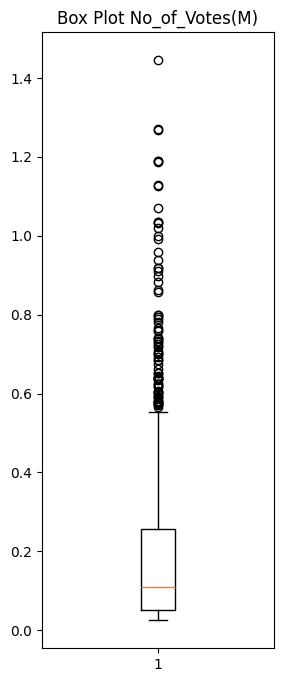

In [11]:
# Identify the outliers in Votes
votes = np.array(df['No_of_Votes(M)'])
import matplotlib.pyplot as plt
plt.figure(figsize=(3,8))
plt.boxplot(votes)
plt.title('Box Plot No_of_Votes(M)')
plt.show()

# Delete the outliers in Votes
Q1 = df['No_of_Votes(M)'].quantile(0.25)
Q3 = df['No_of_Votes(M)'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['No_of_Votes(M)'] >= Q1 - 1.5*IQR) & (df['No_of_Votes(M)'] <= Q3 + 1.5*IQR)]

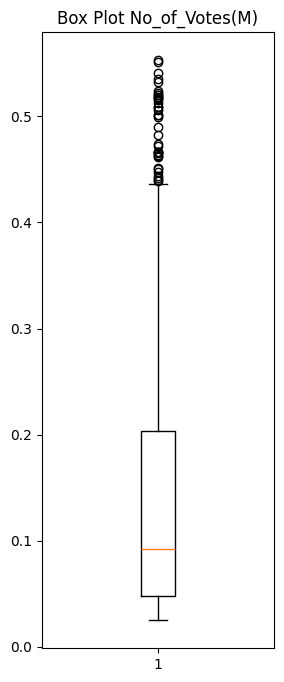

In [12]:
# Identify the outliers in Votes
votes = np.array(df['No_of_Votes(M)'])
import matplotlib.pyplot as plt
plt.figure(figsize=(3,8))
plt.boxplot(votes)
plt.title('Box Plot No_of_Votes(M)')
plt.show()

# Delete the outliers in Votes
Q1 = df['No_of_Votes(M)'].quantile(0.25)
Q3 = df['No_of_Votes(M)'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['No_of_Votes(M)'] >= Q1 - 1.5*IQR) & (df['No_of_Votes(M)'] <= Q3 + 1.5*IQR)]

# 3. Model Planning: 

,IMDB_Rating,No_of_Votes(M),Runtime(Mins),Total_Gross($M)
count,730.000000,730.000000,730.000000,730.000000
mean,7.896849,0.127468,118.119178,34.595893
std,0.222231,0.105276,23.043902,34.718180
min,7.600000,0.025088,64.000000,0.001305
25%,7.700000,0.046770,101.000000,2.818642
50%,7.900000,0.086042,116.000000,22.241452
75%,8.100000,0.179131,132.000000,68.034751
max,8.600000,0.435950,184.000000,161.197785


C:\Users\matq1\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\matq1\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\matq1\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


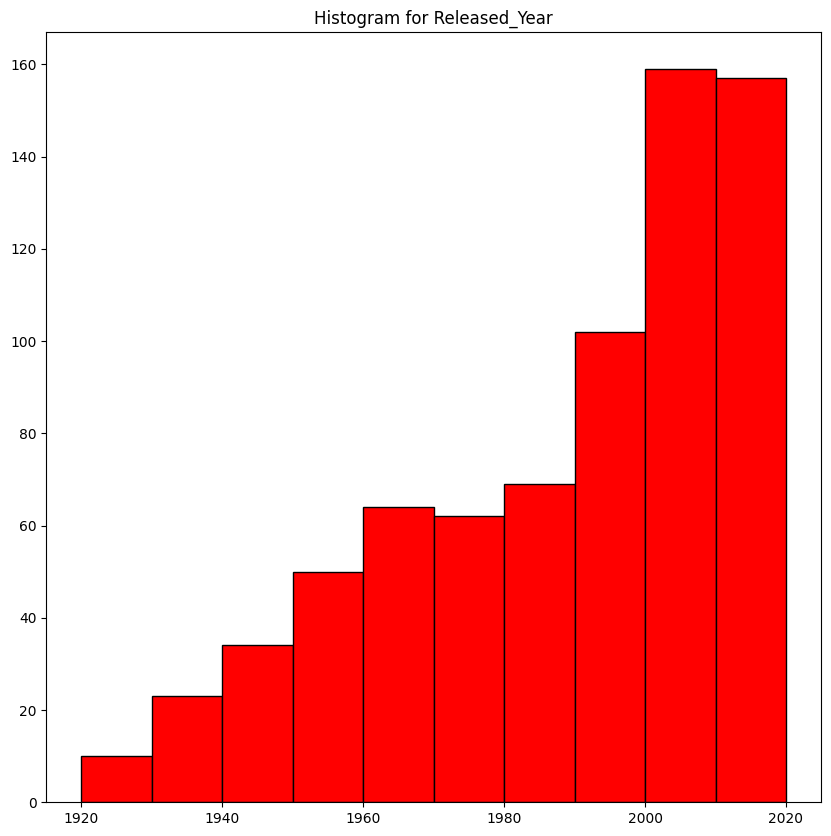

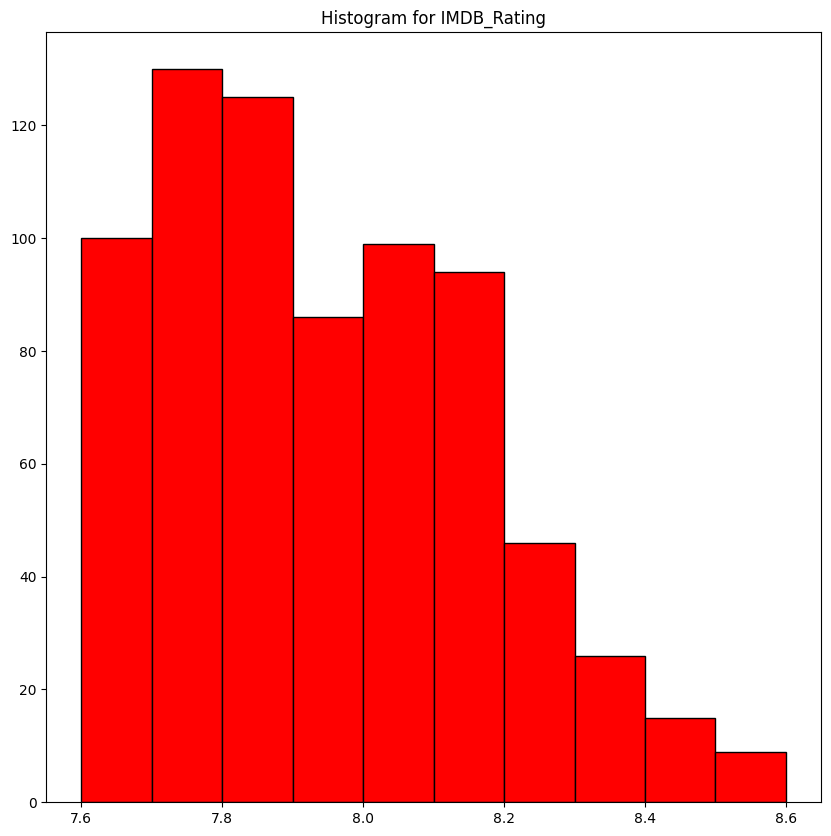

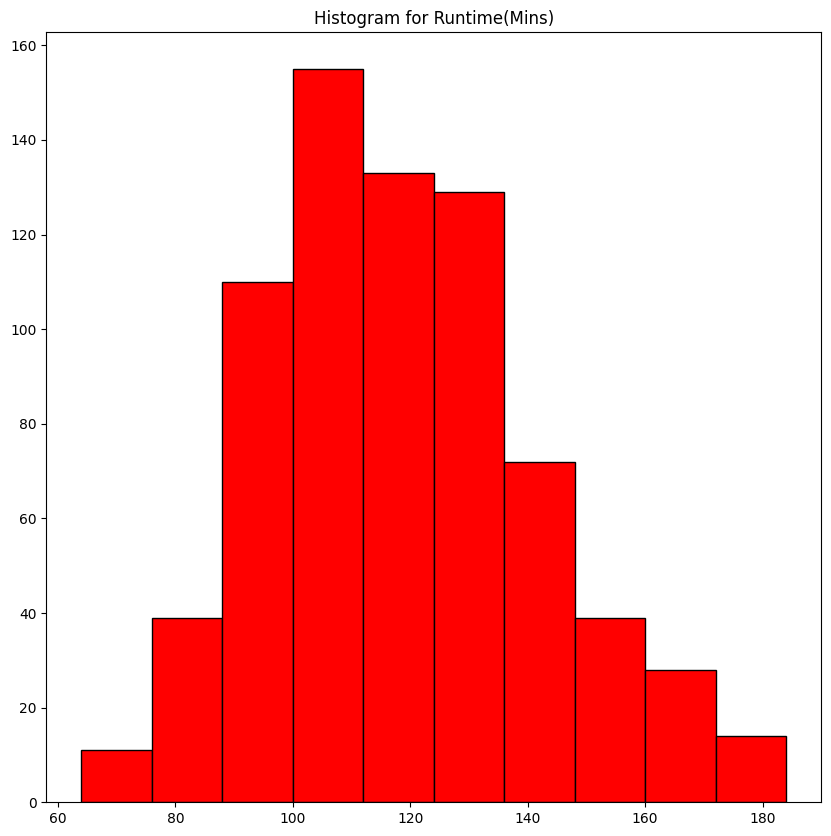

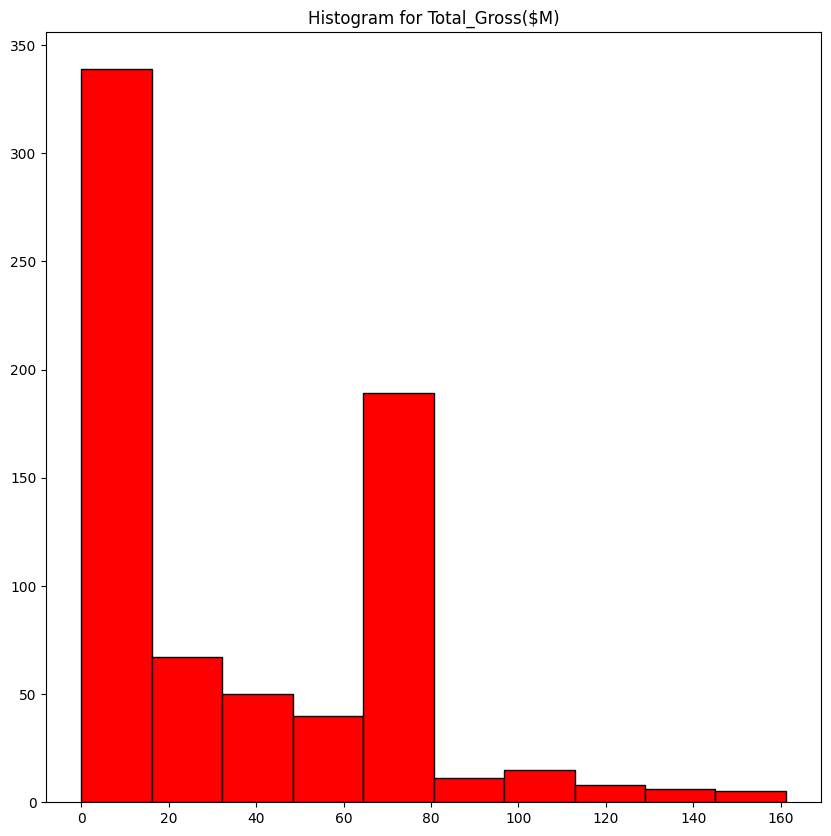

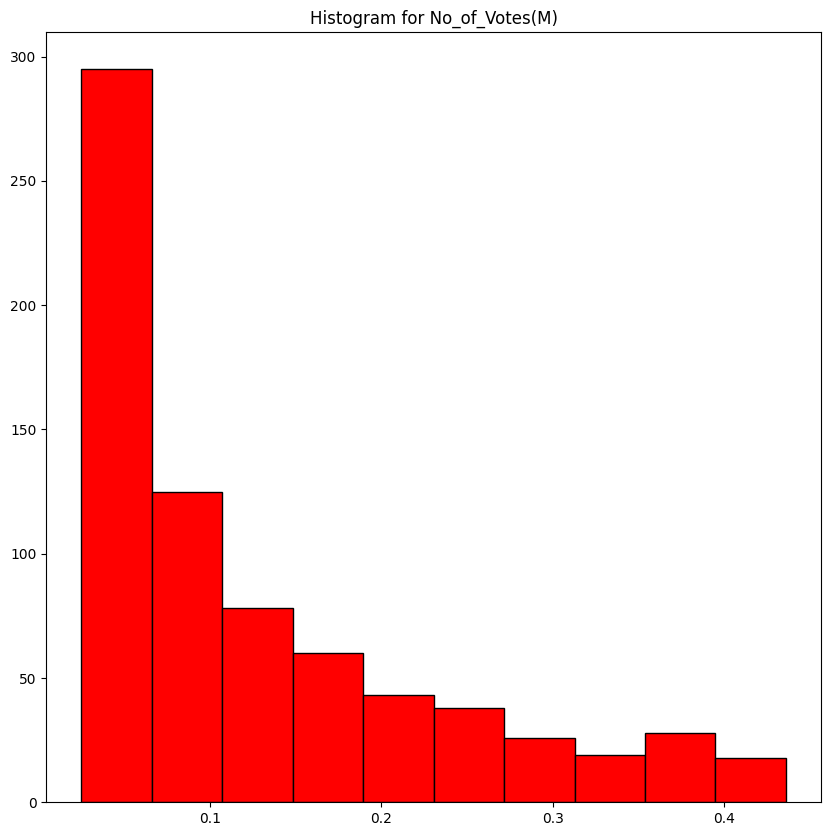

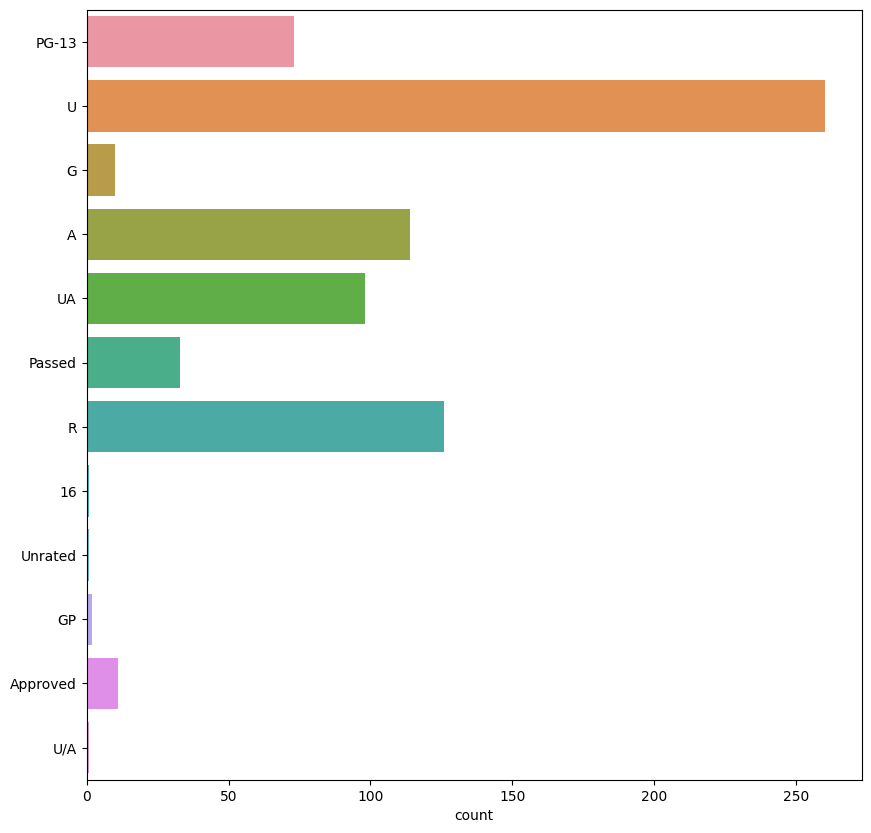

C:\Users\matq1\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\matq1\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\matq1\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


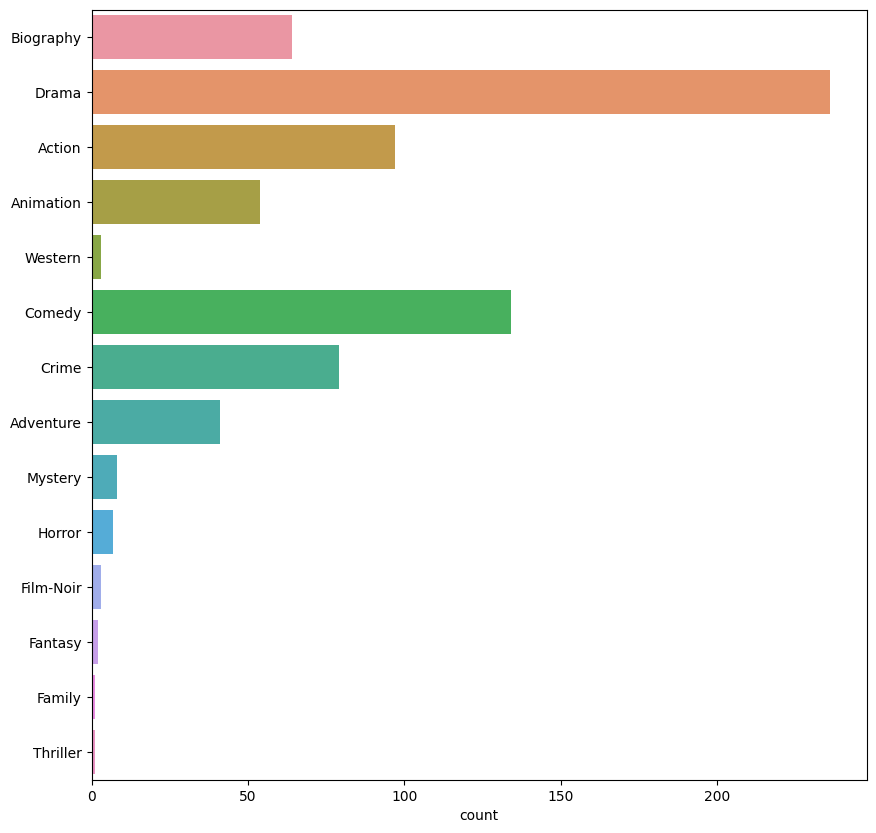

In [13]:
# # 3-a i and ii
# # Find the statistical summaries.
display(df.describe())
# Make univariate graphs (i.e., graphs based on single variable). 

import matplotlib.pyplot as plt

# # 1. Draw the histogram for Released_Year, because it is a numerical variable
year = np.array(df['Released_Year'], dtype=int)
plt.figure(figsize=(10,10))
plt.hist(year, edgecolor='black', color='red', bins=10)
plt.title('Histogram for Released_Year')

# # 2. Draw the histogram for IMDB_Rating, because it is a numerical variable
rating = np.array(df['IMDB_Rating'])
plt.figure(figsize=(10,10))
plt.hist(rating, edgecolor='black', color='red', bins=10)
plt.title('Histogram for IMDB_Rating')

# # 3. Draw the histogram for Runtime(Mins), because it is a numerical variable
Runtime = np.array(df['Runtime(Mins)'])
plt.figure(figsize=(10,10))
plt.hist(Runtime, edgecolor='black', color='red', bins=10)
plt.title('Histogram for Runtime(Mins)')

# # 4. Draw the histogram for Total_Gross($M), because it is a numerical variable
gross = np.array(df['Total_Gross($M)'])
plt.figure(figsize=(10,10))
plt.hist(gross, edgecolor='black', color='red', bins=10)
plt.title('Histogram for Total_Gross($M)')

# # 5. Draw the histogram for No_of_Votes(M), because it is a numerical variable
votes = np.array(df['No_of_Votes(M)'])
plt.figure(figsize=(10,10))
plt.hist(votes, edgecolor='black', color='red', bins=10)
plt.title('Histogram for No_of_Votes(M)')

# # Draw count Plot for Certificate, because it is a categorical variable
import seaborn as sns
cert = np.array(df['Certificate'])
plt.figure(figsize=(10,10))
sns.countplot(y=cert,data=df);
plt.show()

# # Because we have more than one Genre for each movie, we need to make a new column for each genre
# # and each movie will have one main genre.
df['Genre'].unique()[:5]
df['genre'] = df['Genre'].apply(lambda text: text.split(',')[0])
df.drop(columns='Genre', inplace=True)
df['genre'].value_counts()

# # Draw count Plot for Genre, because it is a categorical variable
gen = np.array(df['genre'])
plt.figure(figsize=(10,10))
sns.countplot(y=gen,data=df);
plt.show()


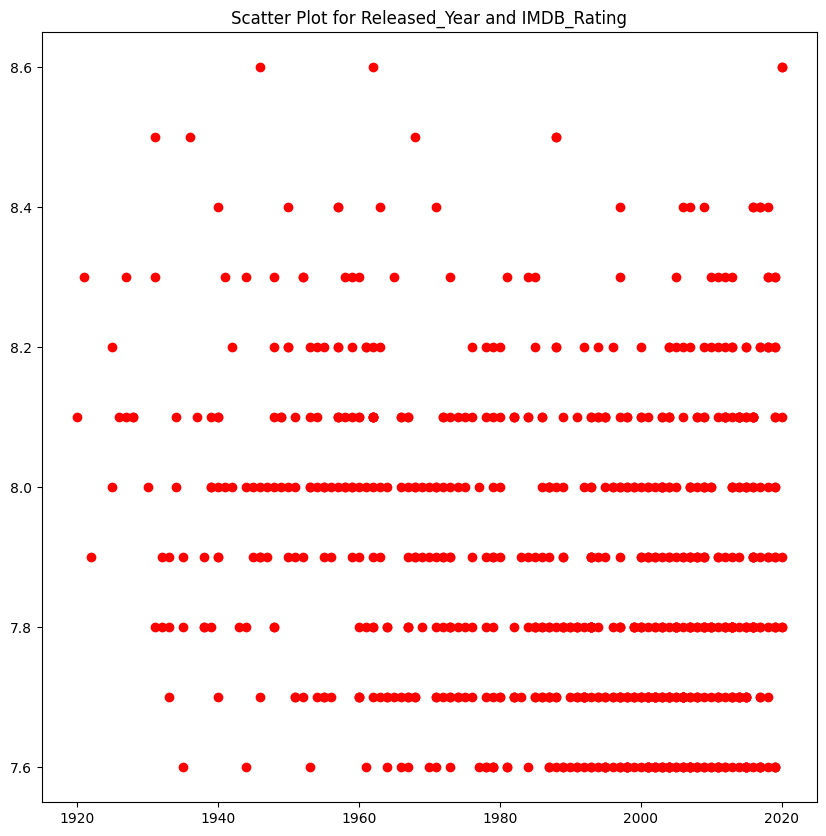

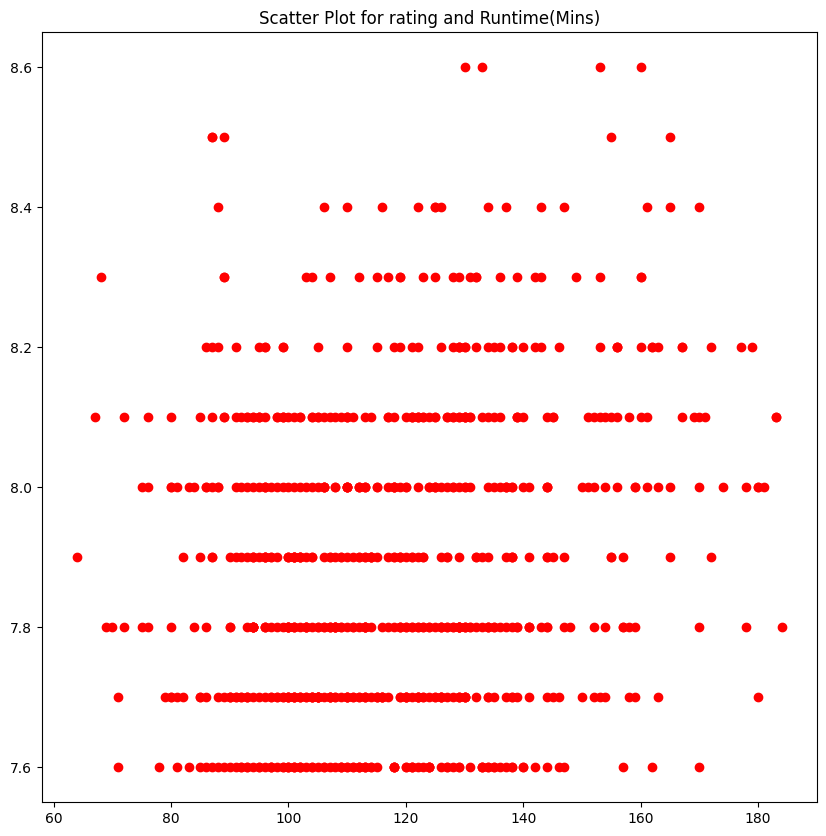

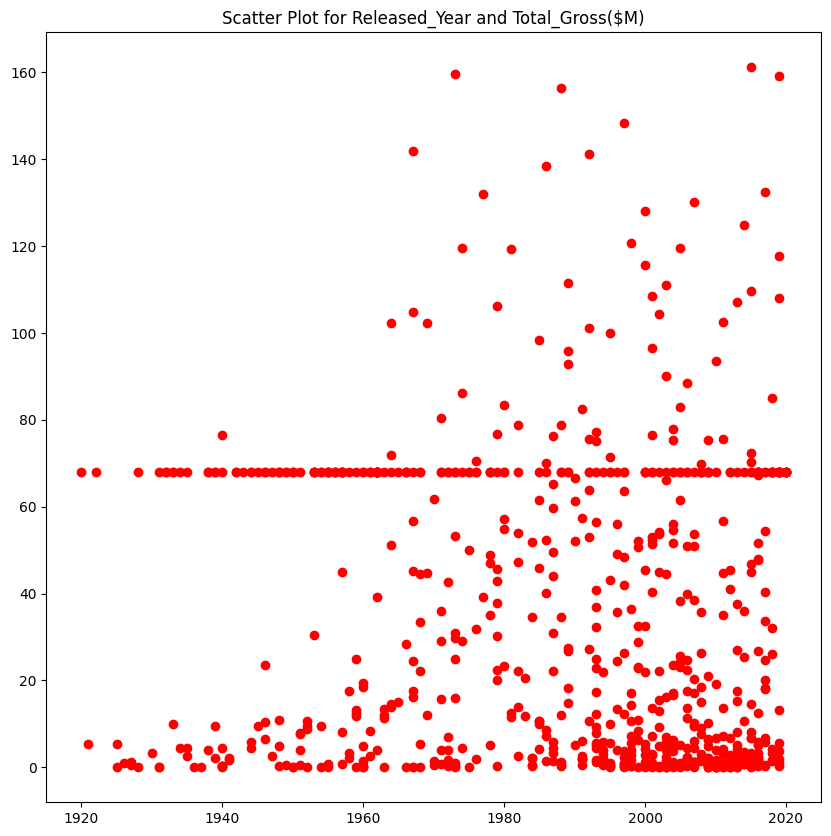

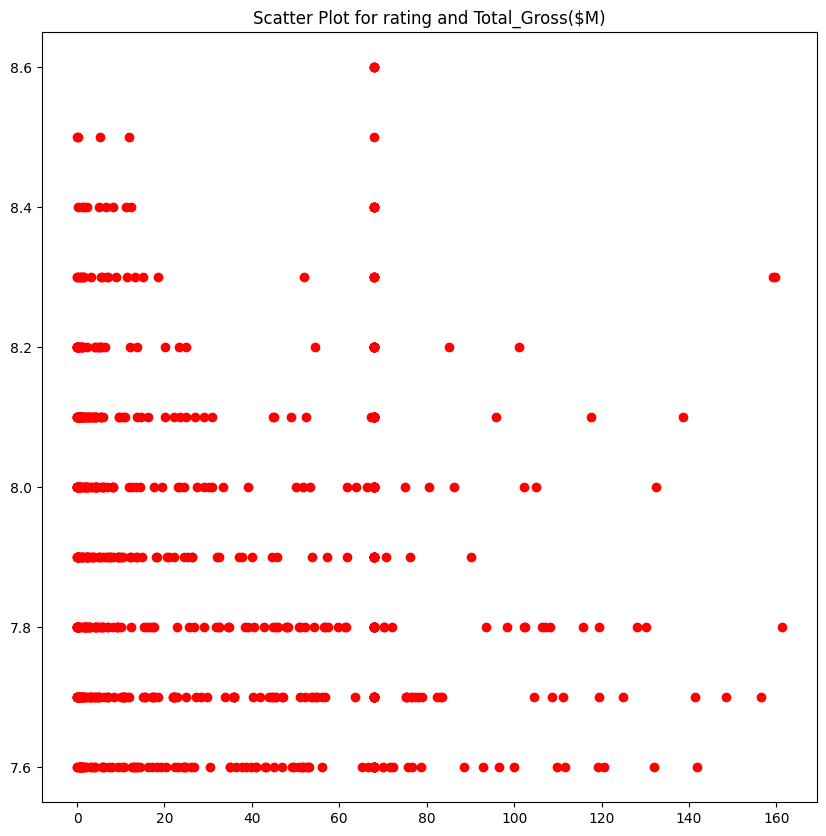

C:\Users\matq1\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\matq1\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\matq1\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


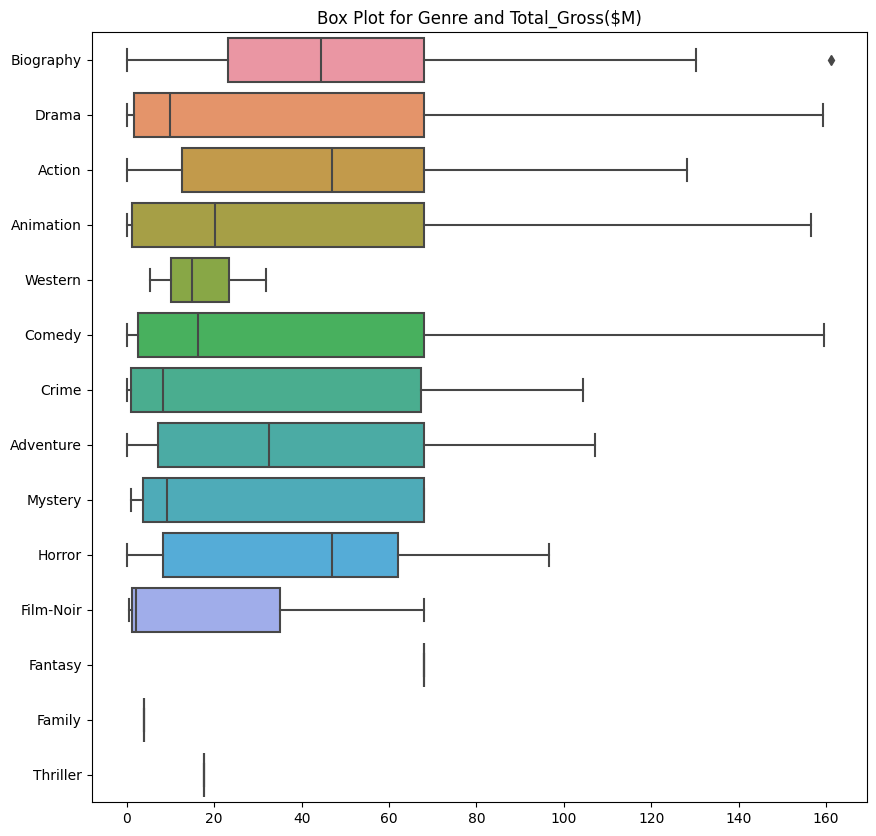

C:\Users\matq1\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\matq1\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\matq1\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\matq1\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

Text(0.5, 1.0, 'Violin Plot for genre and IMDB_Rating')

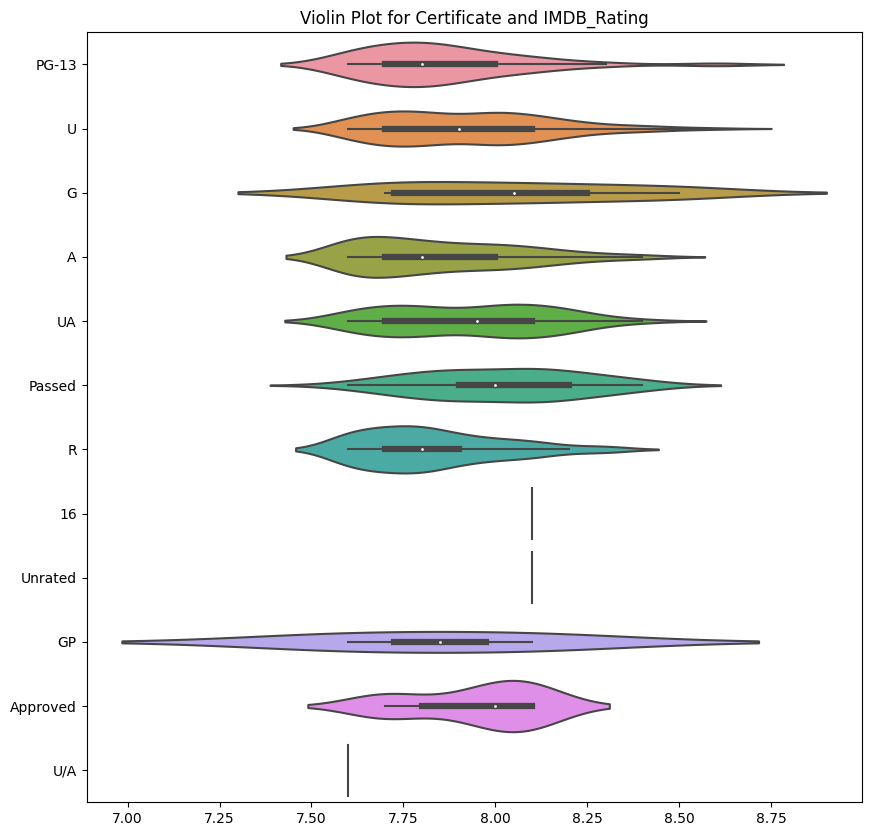

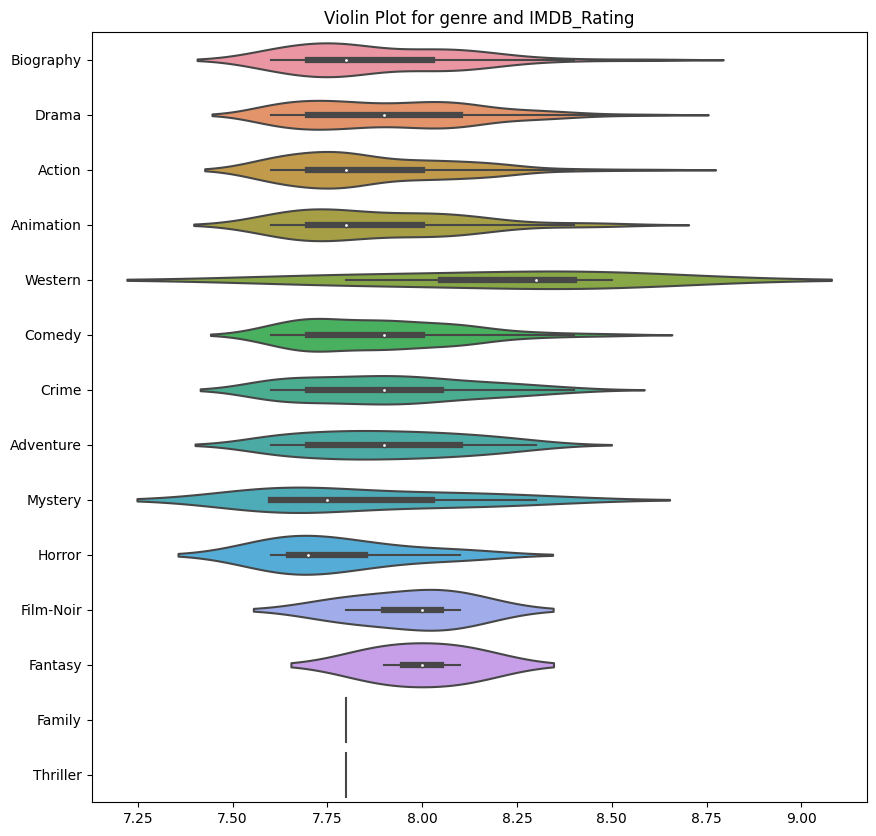

In [14]:
# 3-a iii

# Make bivariate graphs (i.e., graphs based on two variables).

# 1. Draw the scatter plot for Released_Year and IMDB_Rating, because they are numerical variables
plt.figure(figsize=(10,10))
plt.scatter(year, rating, color='red')
plt.title('Scatter Plot for Released_Year and IMDB_Rating')

# 2. Draw the scatter plot for rating and Runtime(Mins), because they are numerical variables
plt.figure(figsize=(10,10))
plt.scatter(Runtime,rating, color='red')
plt.title('Scatter Plot for rating and Runtime(Mins)')
plt.show()

# 3. Draw the scatter plot for Released_Year and Total_Gross($M), because they are numerical variables
plt.figure(figsize=(10,10))
plt.scatter(year, gross, color='red')
plt.title('Scatter Plot for Released_Year and Total_Gross($M)')
plt.show()

# 4. Draw the scatter plot for rating and gross, because they are numerical variables
plt.figure(figsize=(10,10))
plt.scatter(gross, rating, color='red')
plt.title('Scatter Plot for rating and Total_Gross($M)')
plt.show()

# 5. Draw the box plot for gen and gross, because they are categorical with numerical variables
plt.figure(figsize=(10,10))
sns.boxplot(x=gross, y=gen, data=df)
plt.title('Box Plot for Genre and Total_Gross($M)')
plt.show()

# 6. Draw the violinplot for Certificate and IMDB_Rating, because they are categorical with numerical variables
plt.figure(figsize=(10,10))
sns.violinplot(x=rating, y=cert, data=df)
plt.title('Violin Plot for Certificate and IMDB_Rating')

# 7. Draw the violinplot for genre and IMDB_Rating, because they are categorical with numerical variables
plt.figure(figsize=(10,10))
sns.violinplot(x= rating, y=gen, data=df)
plt.title('Violin Plot for genre and IMDB_Rating')

C:\Users\matq1\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\matq1\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\matq1\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\matq1\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

Text(0.5, 1.0, 'Scatter Plot for Genre and gross and year')

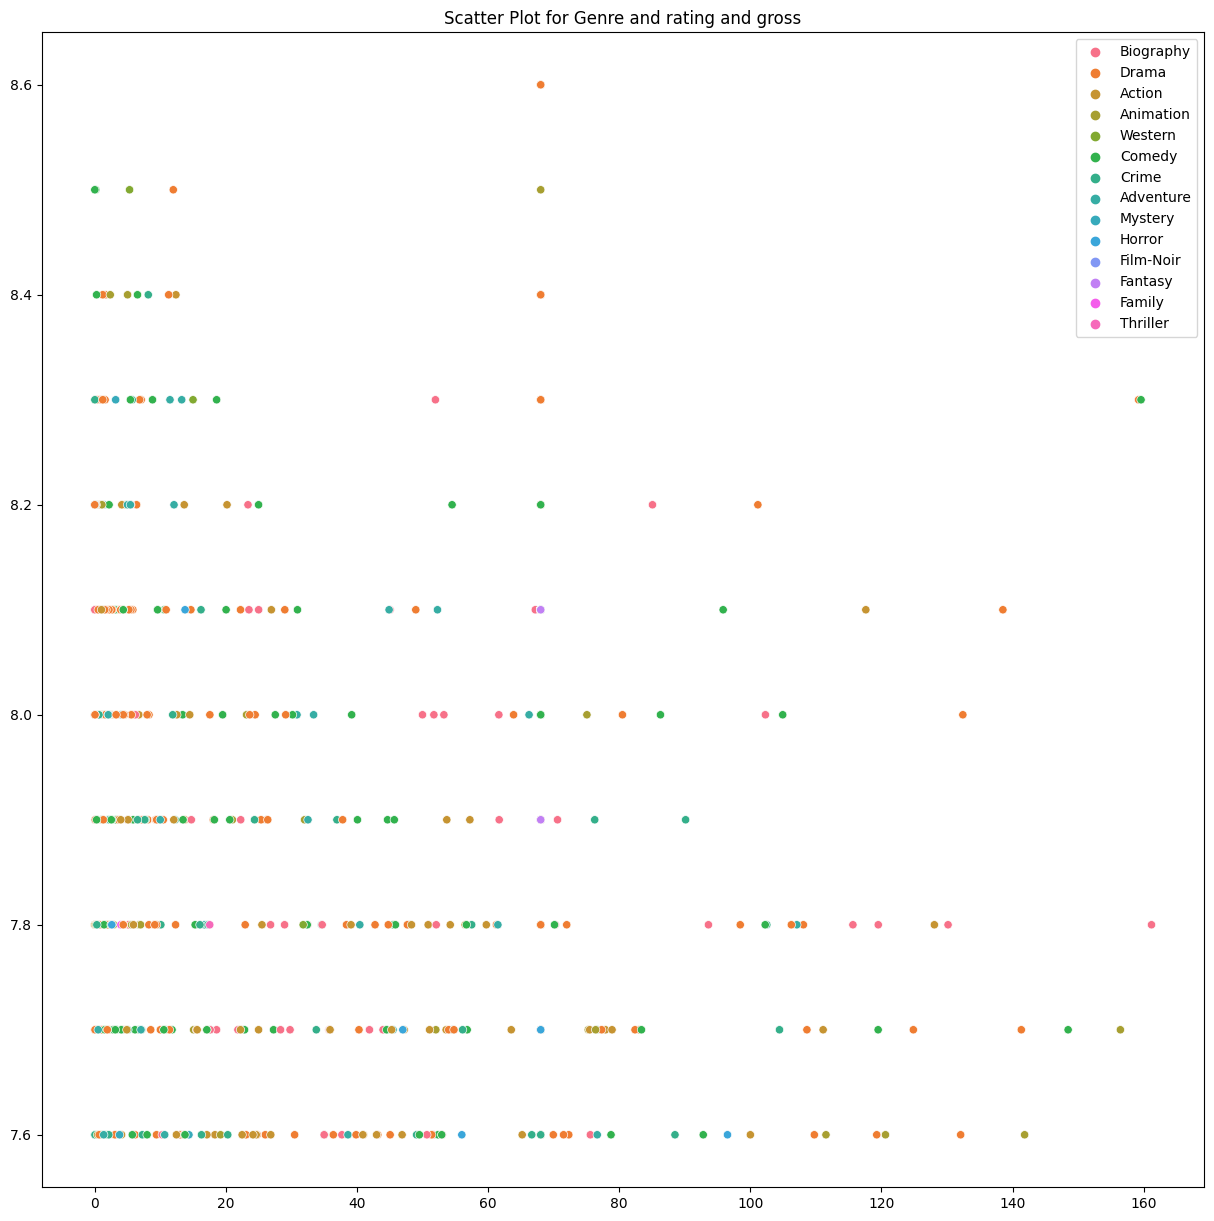

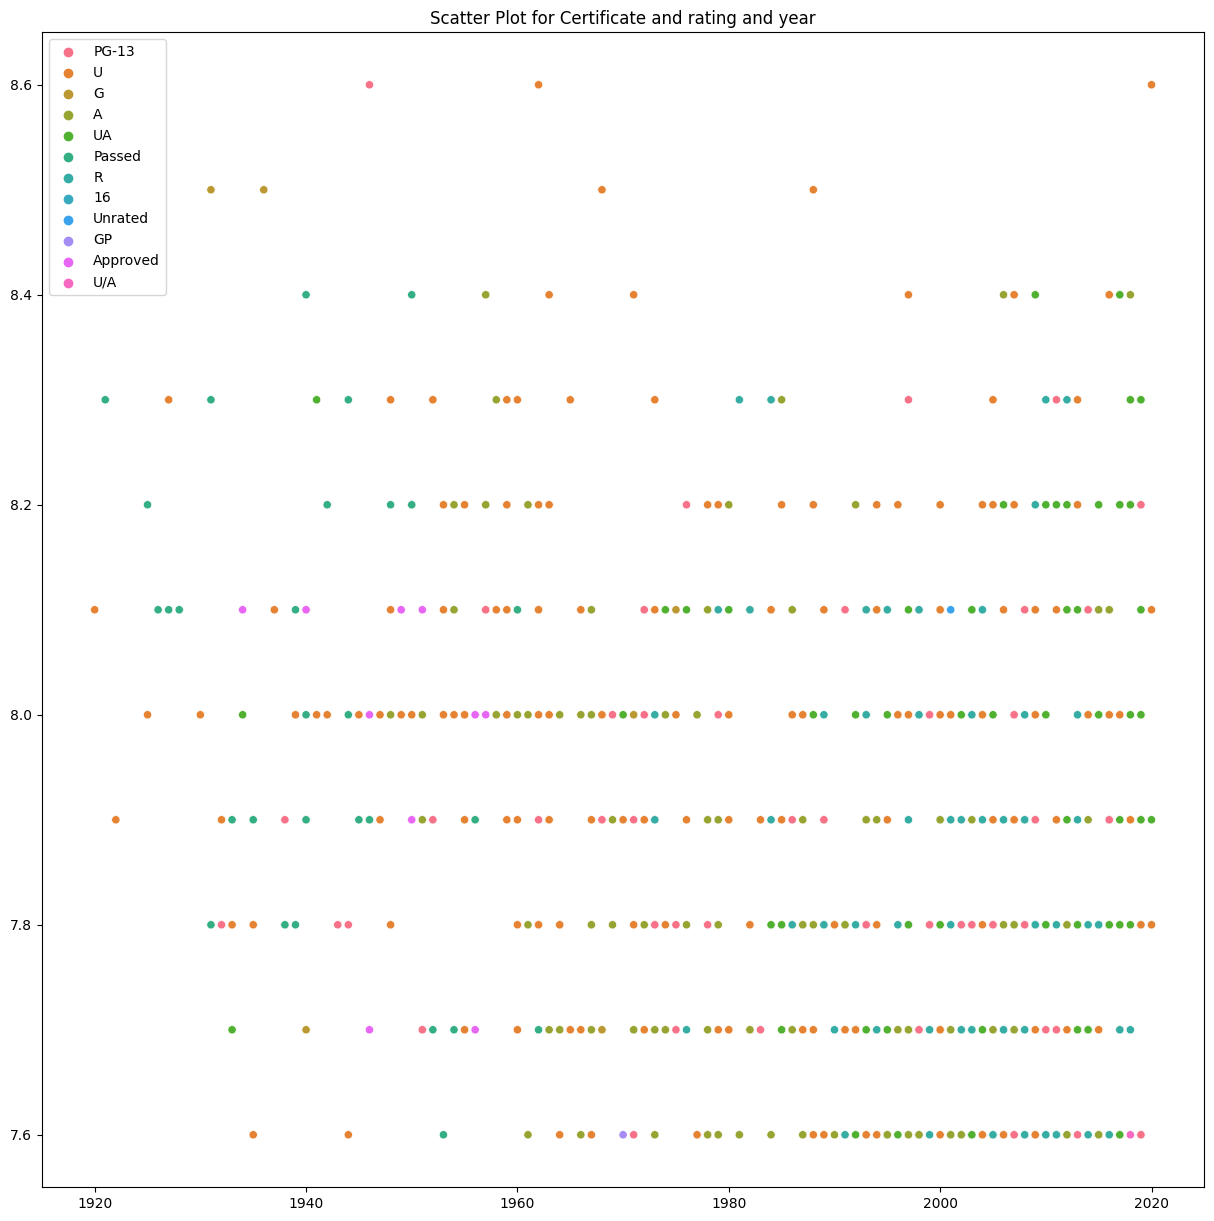

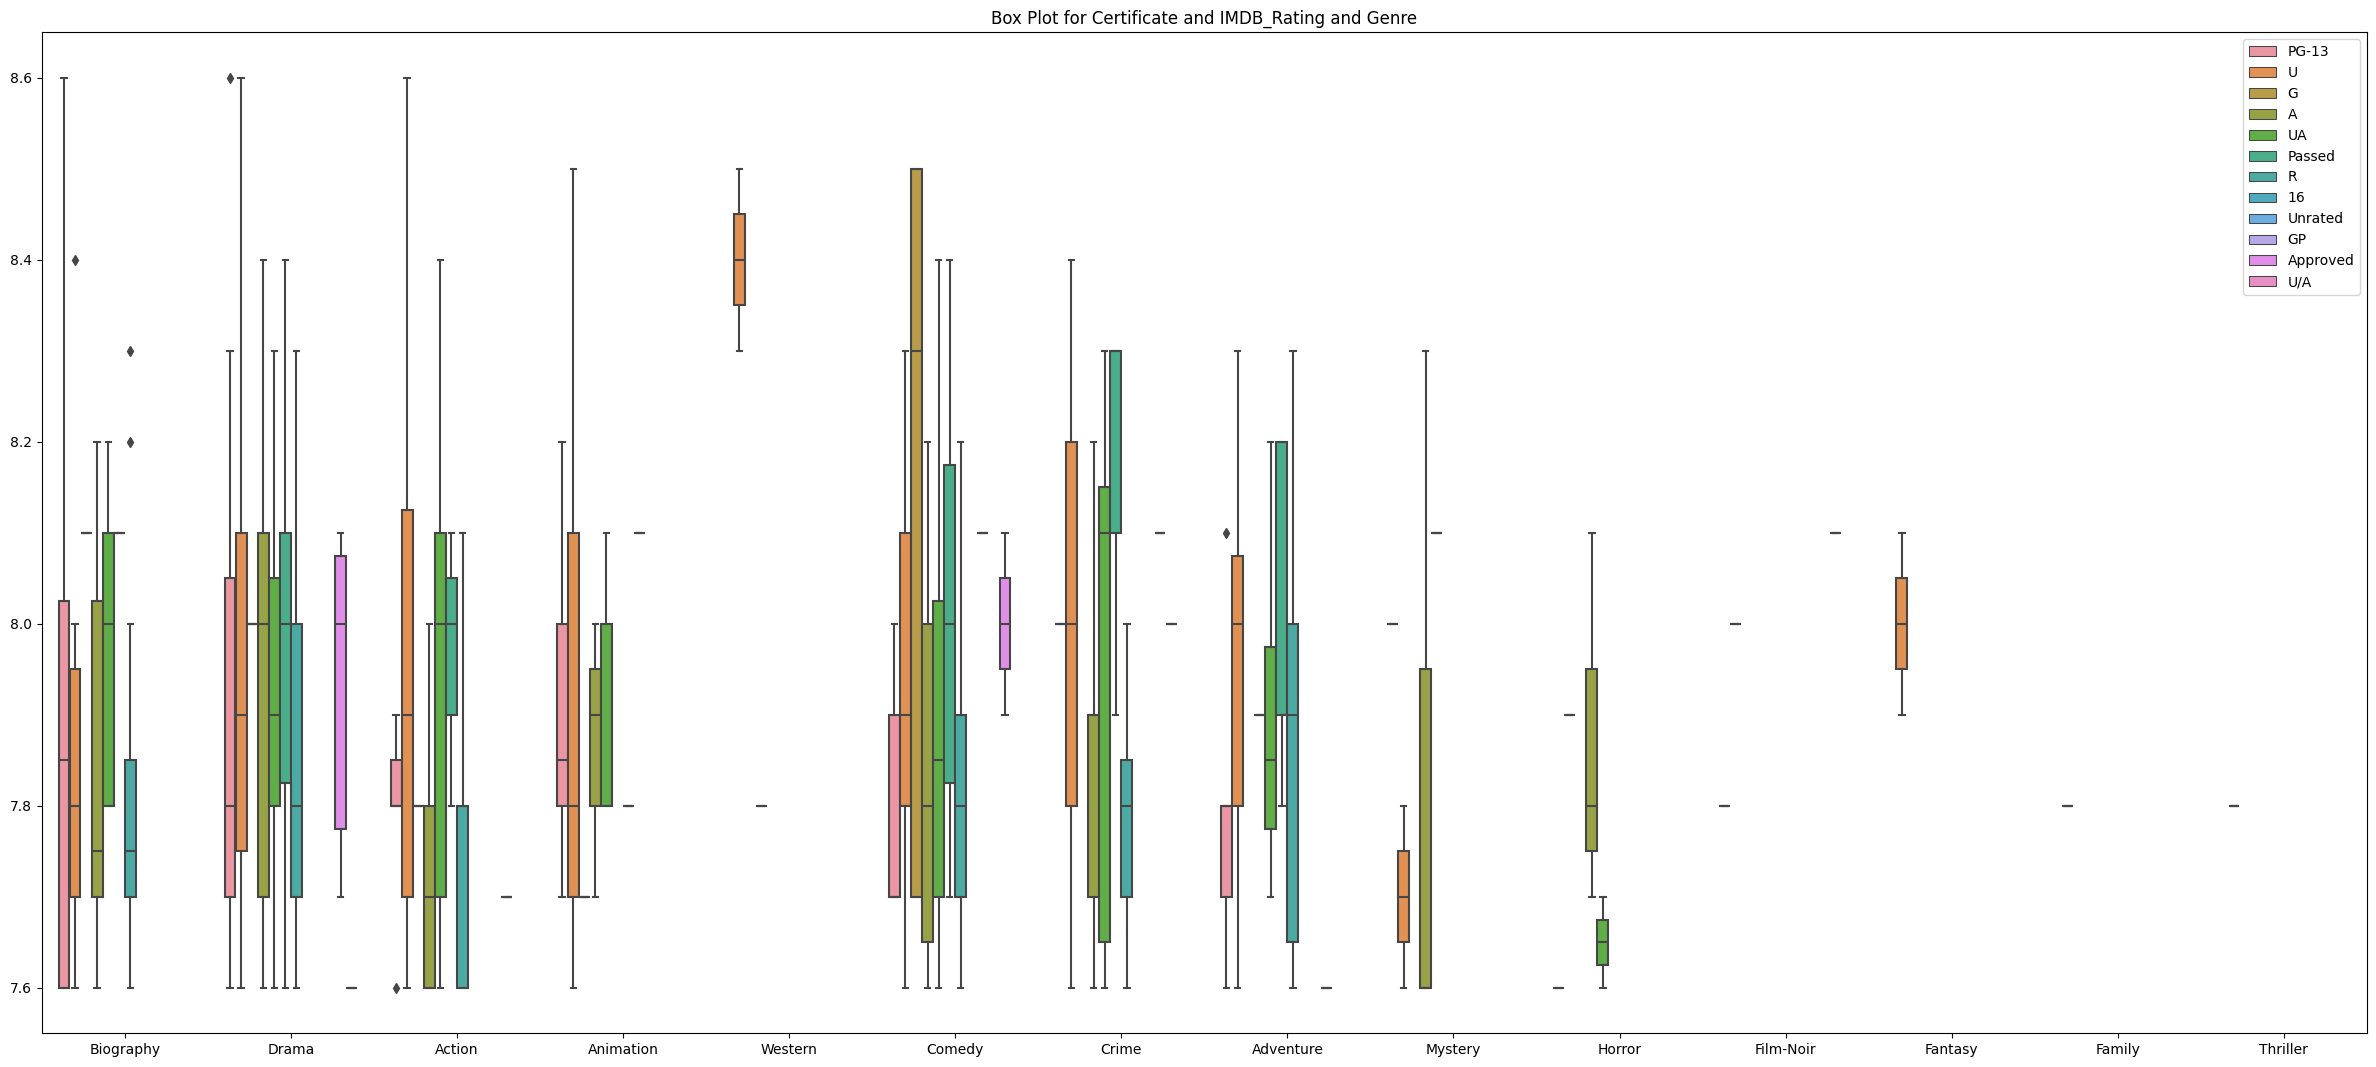

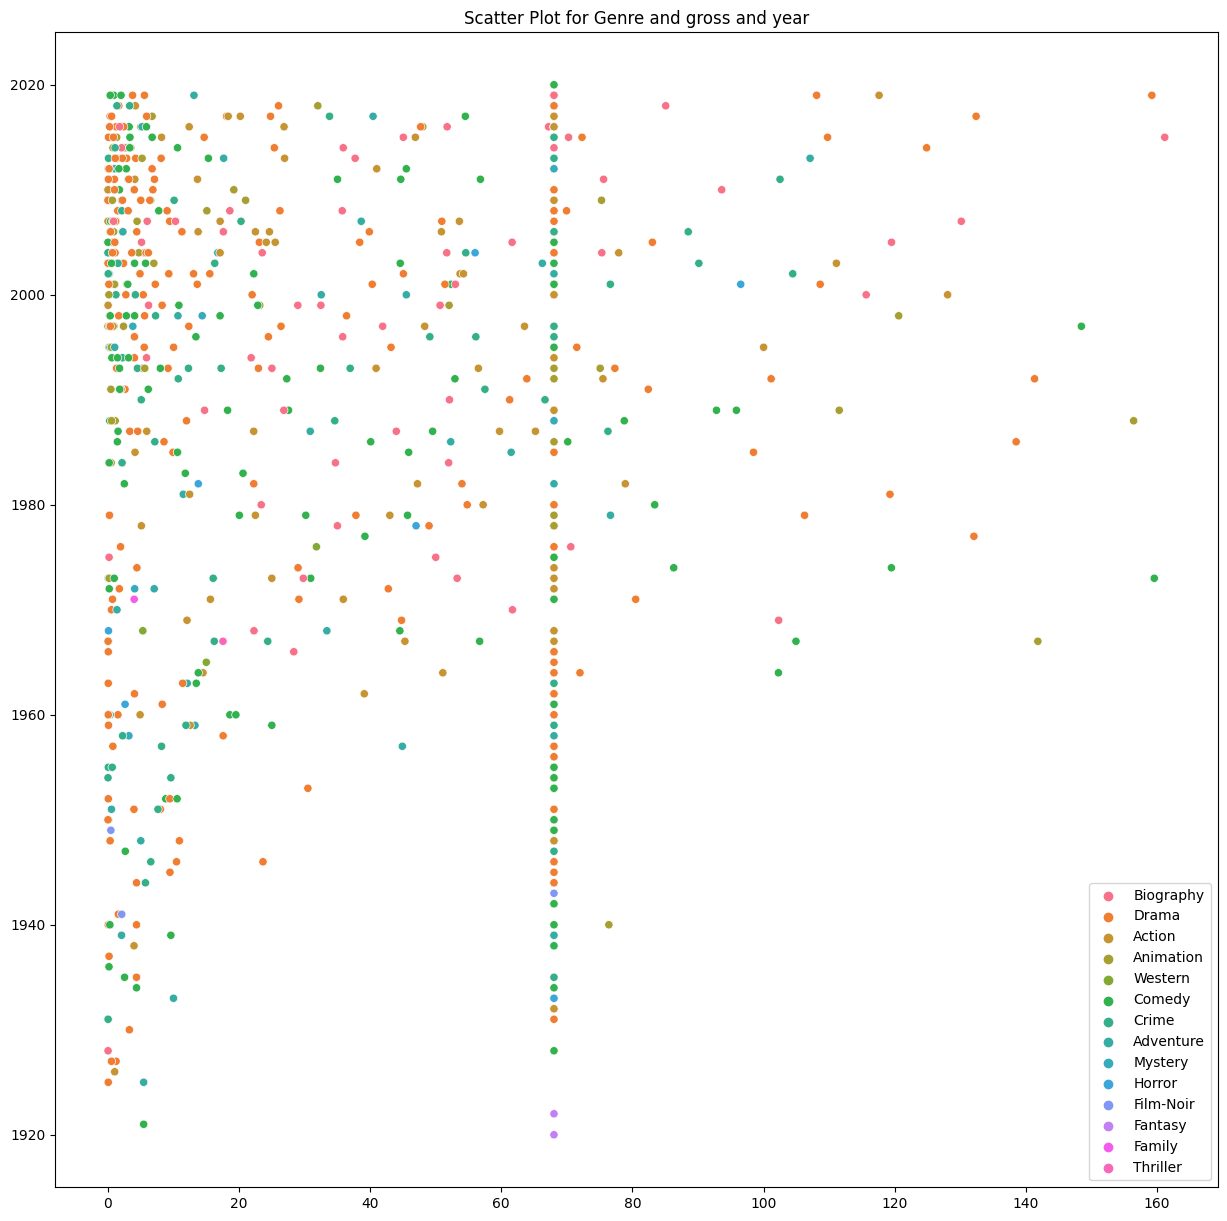

In [15]:
#3-a iv


# 1.Draw the scatter plot for Total_Gross($M) and IMDB_Rtaing and Genre , because there are two numerical variables and one categorical variable 
plt.figure(figsize=(15,15))
sns.scatterplot(x=gross, y=rating, hue=gen, data=df)
plt.title('Scatter Plot for Genre and rating and gross')


# #2.Draw the scatter plot for Released_Year and IMDB_Rtaing and Certificate , because there are two numerical variables and one categorical variable
plt.figure(figsize=(15,15))
sns.scatterplot(x=year, y=rating, hue=cert, data=df)
plt.title('Scatter Plot for Certificate and rating and year')


#3.Draw the BoxPlot for Certificate and IMDB_Rating and Genre, because they are categorical with numerical variables
plt.figure(figsize=(30,13))
sns.boxplot(x=gen, y=rating, hue=cert, data=df)
plt.title('Box Plot for Certificate and IMDB_Rating and Genre')


#4.Draw the scatter plot for Realeased year and Total_Gross($M) and Genre , because there are two numerical variables and one categorical variable
plt.figure(figsize=(15,15))
sns.scatterplot(x=gross, y=year, hue=gen, data=df)
plt.title('Scatter Plot for Genre and gross and year')


In [18]:
# save the cleaned data to a new csv file
df.to_csv('imdb_top_1000_cleaned.csv', index=False)


In [17]:
#3-a v


##Assess the relationship between the variables in the dataset.

#our output variable is Total_Gross($M) and IMDB_Rating
#our input variables are Released_Year, Runtime(Mins), Genre, Certificate

# 1. Draw the correlation matrix for all numerical variables
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for all numerical variables')

## here we use the pearson correlation to find out the relationship between the variables in the dataset
corr = df.corr(method = 'pearson')
display(corr)

## here we use the spearman correlation to find out the relationship between the input variables 
# in the dataset and the output variable Total_Gross($M)
sns.relplot(x=year, y=gross,
            color = 'purple', marker = 'D',
            kind='scatter',
            data=df)
plt.xlabel('Released_Year')
plt.ylabel('Total_Gross($M)')
plt.show()


sns.relplot(x=Runtime, y=gross,
            color = 'purple', marker = 'D',
            kind='scatter',
            data=df)
plt.xlabel('Runtime(Mins)')
plt.ylabel('Total_Gross($M)')
plt.show()








# here we use the spearman correlation to find out the relationship between the input variables in the dataset 
# and the output variable IMDB_Rating

sns.relplot(x=year, y=rating,
            color = 'purple', marker = 'D',
            kind='scatter',
            data=df)
plt.xlabel('Released_Year')
plt.ylabel('IMDB_Rating')
plt.figure(figsize=(10,10))



sns.relplot(x=Runtime, y=rating,
            color = 'purple', marker = 'D',
            kind='scatter',
            data=df)
plt.xlabel('Runtime(Mins)')
plt.ylabel('IMDB_Rating')
plt.show()




## Clearly we can see from the Pearson correlation (all of them less than 0.4 which indicated that there is no relationship) 
# and the graphs between input variables and output variables that there is no clear relationship  


ValueError: could not convert string to float: 'Hamilton'

<Figure size 1000x1000 with 0 Axes>

## b
# Summarise for ii and iii 
- We can see in the histogram plot for Released_Year that, the number of movies increased last 20 years, and there are more movies released between 2000 and 2010.
- We can see in the histogram plot for IMDB_Rating that, the number of movies with the rating between 7.7 and 7.9 is the most.
- We can see in the histogram plot for Runtime(Mins) that, the number of movies with a runtime between 100 and 110 mins is the most.
- We can see in the histogram plot for Total_Gross($M) that, the number of movies with a gross between 0 and 18 million is the most.
- We can see in the histogram plot for No_of_Votes(M) that, the number of movies with votes between 0 and 0.05 million is the most.
- We can see in the count plot for Certificate that, the number of movies with certificate U (Universal) is the most.
- We can see in the count plot for Genre that the number of movies with the genre Drama is the most.
- We can see in the scatter plot for Released_Year and IMDB_Rating that, the movies that have ratings less than 8 increased  between 1990 and 2020.
- We can see in the scatter plot for rating and Runtime(Mins) that, the movies between 80 mins and 140 mins have a rating between 7.6 and 8
- We can see in the scatter plot for Released_Year and Total_Gross($M) that, the movies with a total gross between 0 and 18 million are released in the last 20 years.
- We can see in the scatter plot for Rating and Total_Gross($M) that, the total gross of the movie does not always depend on the rating of the movie.
- We can see in the box plot, the movies with certificate G (Appropriate for people of all ages) have more chances to get a higher rating, and movies with certificate GP have a lower rating.
- We can see in the violinplot, that movies with the genre western are more likely to get a higher rating.
# Summarise for v
- Clearly we can see from the Pearson correlation (all of them less than 0.4 which indicated that there is no relationship).
- The graphs between input variables and output variables that there is no clear relationship.


## 4. Model Building:

We used regression because we work with numeric data and we want to see how the variables in the dataset affect the total gross of the movie.


In [16]:
#count plot for the top 5 actors
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

#preform label encoding on the categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Director'] = le.fit_transform(df['Director'])
df['Actor'] = le.fit_transform(df['Actor'])
df['genre'] = le.fit_transform(df['genre'])
df['genre'] = le.fit_transform(df['genre'])
df['Certificate'] = le.fit_transform(df['Certificate'])

# plt.figure(figsize=(10,10))
# sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
# plt.title('Correlation Matrix for all numerical variables')
#move the gross to the last column
cols = list(df.columns.values)
cols.pop(cols.index('Total_Gross($M)'))
df = df[cols+['Total_Gross($M)']]
display(df)


X = df.iloc[:,1:-1].values
y = df.iloc[:, -1].values 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


from sklearn.linear_model import LinearRegression
reg1 = LinearRegression(fit_intercept=False).fit(X_train, y_train)
y_pred1 = reg1.predict(X_test)
print('The MSE using OLS is:', mean_squared_error(y_test, y_pred1))


## Ridge
from sklearn.linear_model import RidgeCV
reg2 = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], fit_intercept=False,cv=10).fit(X_train, y_train)
y_pred2 = reg2.predict(X_test)
print('The MSE using Ridge is:', mean_squared_error(y_test, y_pred2))


## Lasso
from sklearn.linear_model import LassoCV
reg3 = LassoCV(alphas=[1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], 
               fit_intercept=False,cv=10, random_state=0).fit(X_train, y_train)
y_pred3 = reg3.predict(X_test)
print('The MSE using Lasso is:', mean_squared_error(y_test, y_pred3))

best_beta =  np.round(reg3.coef_,2)
best_beta_0 = np.round(reg3.intercept_,2)
print(f'The best values for the estimates are :', best_beta_0, best_beta.tolist())
print("=====================================================")
print('The best penalty coefficient is:', reg3.alpha_)
print('The best coefficient estimates are:', reg3.coef_)

,Movie_Title,Released_Year,Director,Actor,IMDB_Rating,No_of_Votes(M),Runtime(Mins),Certificate,genre,Total_Gross($M)
18,Hamilton,2020,405,314,8.6,0.055291,160,5,3,68.034751
20,Soorarai Pottru,2020,387,464,8.6,0.054995,153,8,6,68.034751
30,Seppuku,1962,257,477,8.6,0.042004,133,8,0,68.034751
32,It's a Wonderful Life,1946,111,229,8.6,0.405801,130,5,6,68.034751
45,Nuovo Cinema Paradiso,1988,132,393,8.5,0.230763,155,8,6,11.990401
...,...,...,...,...,...,...,...,...,...,...
994,A Hard Day's Night,1964,329,258,7.6,0.040351,87,8,4,13.780024
995,Breakfast at Tiffany's,1961,43,41,7.6,0.166544,115,1,4,68.034751
997,From Here to Eternity,1953,114,80,7.6,0.043374,118,6,6,30.500000
998,Lifeboat,1944,20,475,7.6,0.026471,97,8,6,68.034751


The MSE using OLS is: 1185.359798070593
The MSE using Ridge is: 1190.9360979339388
The MSE using Lasso is: 1184.7685625021193
The best values for the estimates are : 0.0 [0.03, 0.01, 0.03, -4.43, 67.91, -0.01, -0.72, -0.25]
The best penalty coefficient is: 0.01
The best coefficient estimates are: [ 2.97755657e-02  8.36806197e-03  2.54736271e-02 -4.42517138e+00
  6.79113785e+01 -1.11373947e-02 -7.24039282e-01 -2.52653670e-01]


c:\Users\matq1\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 232681.31359452422, tolerance: 109.47461510601032
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\matq1\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 253816.49572707873, tolerance: 109.47461510601032
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\matq1\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 253978.1166709223, tolerance: 109.47461510601032
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\matq1\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:61

## 4-B
Lasso Regression is better than Ridge and OLS it has a better score and it has a better MSE, but it is still hard to predict future values because the MSE is high and the score is low. 


## 4-C
From the regression analysis, we can say that input variables seems to have no relationship with **The_Gross_Value**. 

## 5 
# Guidelines:
- We used regression because we work with numeric data and we want to see how the variables in the dataset affect the total gross of the movie.

- We tried to predict the factors that affect the total gross of the movie, like the rating, the year of release, the genre, the certificate, and the director.


# Problems faced:
- We faced a problem with the data, because we had to clean the data and impute the missing values.

- We faced a problem with the data, because we had to convert the categorical data to numeric data.

- The genre column had multiple values, so we had to use the first value in the column, which is the primary genre in the movie. 

- We faced a problem with the data, because we had to remove the outliers.

- We faced a problem with the data, because we had to clean the data and impute the missing values.




## 6
# Summary :

- We chose the dataset from Kaggle, which is about movies and their information.


- While doing the data preparation, we had to clean the data and impute the missing values.

- We converted the total gross and the number of votes to millions by and we change the columns name to put (M) by dividing by 1000000 to be more readable and understandable.

- While doing the data analysis, we found out that there is no correlation between the choosen variables and the total gross of the movie.

- The Pearson correlation shows that all of them are  less than 0.4 and the graphs between input variables and output variables shows that there is no clear relationship.

- We used regression because we work with numeric data and we want to see how the variables in the dataset affect the total gross of the movie.






# Recommendations :
- We recommend using more variables to get a better prediction the total gross of the movie, the production countrym the budget, the language, the production company, and the writer.
- Use different models to get better predictions.
- Use up-to-date data.
- use different filtering methods.